In [5]:
%matplotlib inline
import torch as t
import matplotlib.pyplot as plt
from IPython import display

device = t.device('cpu')  #如果你想用gpu，改成t.device('cuda:0')

In [7]:
import torch.utils.data as data

In [11]:
import torch.nn as nn

In [8]:
# 生成数据
def get_data(batch_size):
    x = t.randn(batch_size)
    y = 3 * x + 2 + t.normal(0, 1, x.shape)
    return x, y


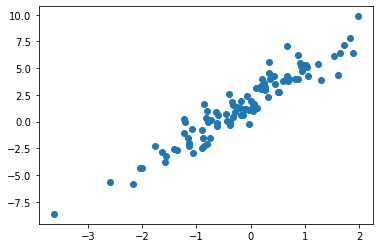

In [24]:
# 来看看产生的x-y分布
x, y = get_data(batch_size=100)
plt.scatter(x.numpy(), y.numpy())

In [26]:
x.size(), y.size()

(torch.Size([100]), torch.Size([100]))

In [29]:
def load_array(data_arrays, batch_size, is_train=True):
    dataset = t.utils.data.TensorDataset(*data_arrays)
    return t.utils.data.DataLoader(dataset, batch_size, shuffle=is_train)

dataiter = load_array((x, y), 4)
iter(dataiter).next()
    

[tensor([ 0.1162, -1.4136,  1.9822, -0.6406]),
 tensor([ 1.2729, -2.5870,  9.8569,  0.8729])]

In [30]:
# 损失函数为均方误差
criterion = t.nn.MSELoss()

In [50]:
# 定义网络
network = nn.Linear(1, 1)
print(network)

Linear(in_features=1, out_features=1, bias=True)


In [51]:
optimizer = t.optim.SGD(network.parameters(), lr=0.03)

In [52]:
epoches = 100
losses = []

for epoch in range(epoches):
    running_loss = 0.0
    for data in dataiter:
        x, y = data[0], data[1]
        x = x.view(-1, 1)
        y = y.view(-1, 1)
        y_hat = network(x)
        loss = criterion(y_hat, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        running_loss += loss.item()
    l = criterion(network(x), y)
    losses.append(l.item())
    print(f'epoch:{epoch + 1}, loss:{l.item()}')
    running_loss = 0.0

epoch:1, loss:4.571663856506348
epoch:2, loss:1.155283808708191
epoch:3, loss:2.069011926651001
epoch:4, loss:0.5246031284332275
epoch:5, loss:1.9271934032440186
epoch:6, loss:2.5029163360595703
epoch:7, loss:0.28694072365760803
epoch:8, loss:3.2417891025543213
epoch:9, loss:0.0803002193570137
epoch:10, loss:1.192193865776062
epoch:11, loss:0.8345655202865601
epoch:12, loss:2.3140621185302734
epoch:13, loss:0.9196696877479553
epoch:14, loss:0.9258817434310913
epoch:15, loss:1.2223079204559326
epoch:16, loss:0.01492505706846714
epoch:17, loss:0.9358761310577393
epoch:18, loss:0.29726442694664
epoch:19, loss:0.985447883605957
epoch:20, loss:2.473515272140503
epoch:21, loss:0.14946523308753967
epoch:22, loss:1.6755741834640503
epoch:23, loss:0.07824305444955826
epoch:24, loss:0.8044385313987732
epoch:25, loss:1.6808921098709106
epoch:26, loss:1.6688411235809326
epoch:27, loss:0.47144484519958496
epoch:28, loss:1.0405830144882202
epoch:29, loss:0.664794385433197
epoch:30, loss:1.1374030113

In [53]:
print(list(network.parameters()))

[Parameter containing:
tensor([[3.0701]], requires_grad=True), Parameter containing:
tensor([1.8951], requires_grad=True)]


(0.0, 4.8716638565063475)

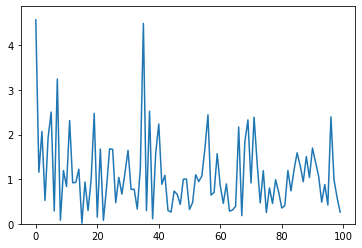

In [55]:
plt.plot(losses)
plt.ylim(0, max(losses) + 0.3)

In [59]:
datset = t.utils.data.TensorDataset(*(x, y))
print(datset[0])

(tensor([0.5977]), tensor([3.8283]))


用autograd实现的线性回归最大的不同点就在于autograd不需要计算反向传播，可以自动计算微分。这点不单是在深度学习，在许多机器学习的问题中都很有用。另外需要注意的是在每次反向传播之前要记得先把梯度清零。

本章主要介绍了PyTorch中两个基础底层的数据结构：Tensor和autograd中的Variable。Tensor是一个类似Numpy数组的高效多维数值运算数据结构，有着和Numpy相类似的接口，并提供简单易用的GPU加速。Variable是autograd封装了Tensor并提供自动求导技术的，具有和Tensor几乎一样的接口。`autograd`是PyTorch的自动微分引擎，采用动态计算图技术，能够快速高效的计算导数。